In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Bezpośrednio zminimalizować funkcję kosztu regresji liniowej

In [2]:
data_str = '''Region Alcohol Tobacco
North 6.47 4.03
Yorkshire 6.13 3.76
Northeast 6.19 3.77
East_Midlands 4.89 3.34
West_Midlands 5.63 3.47
East_Anglia 4.52 2.92
Southeast 5.89 3.20
Southwest 4.79 2.71
Wales 5.27 3.53
Scotland 6.08 4.51
Northern_Ireland 4.02 4.56'''

In [3]:
from io import StringIO
df = pd.read_csv(StringIO(data_str), sep=r'\s+')
df.head(11)

,Region,Alcohol,Tobacco
0,North,6.47,4.03
1,Yorkshire,6.13,3.76
2,Northeast,6.19,3.77
3,East_Midlands,4.89,3.34
4,West_Midlands,5.63,3.47
5,East_Anglia,4.52,2.92
6,Southeast,5.89,3.20
7,Southwest,4.79,2.71
8,Wales,5.27,3.53
9,Scotland,6.08,4.51


In [4]:
X = df.Tobacco
y = df.Alcohol

Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{error\_MSE}(a,b;(x,y)) =  \sum_{i=1}^{n} ( y_i - (ax_i+b) )^2.
$$

In [5]:
def error_MSE(arg, *args):
    X, y = args[0], args[1]    
    a, b = arg
    return np.sum((y-(a*X+b))**2)

Zdafiniuj funkcję opisującą błąd basolutny:

$$
\mathrm{error\_MAE}(a,b;(x,y)) =  \sum_{i=1}^{n} |y_i - (ax_i+b)|.
$$

In [6]:
def error_MAE(arg, *args):
    X, y = args[0], args[1]
    a, b = arg
    return np.sum(np.abs(y-(a*X+b)))

In [7]:
from scipy import optimize

x0 = np.asarray((1, 1))
min_value_MSE = optimize.fmin_cg(error_MSE, x0, args=(X[:-1], y[:-1])) 
print(min_value_MSE)

min_value_MAE = optimize.fmin_cg(error_MAE, x0, args = (X[:-1],y[:-1]))
print(min_value_MAE)

Optimization terminated successfully.
         Current function value: 1.591473
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
[1.00588846 2.04124954]
         Current function value: 3.470087
         Iterations: 4
         Function evaluations: 479
         Gradient evaluations: 158
[1.30028942 1.22801907]


Jak widać otrzymujemy podobne rozwiązania.

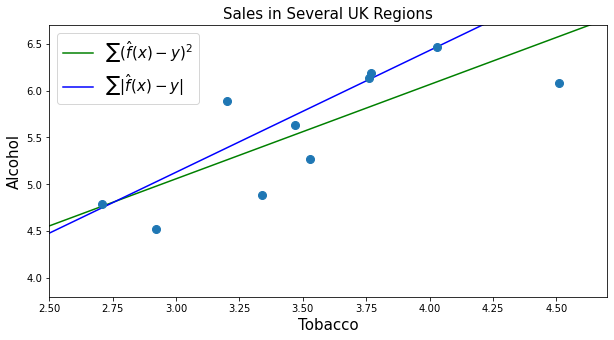

In [8]:
x_f_lr = np.linspace(1., 5., 200)
f_lr_MSE = lambda x: min_value_MSE[0] * x + min_value_MSE[1]
y_f_lr_MSE = f_lr_MSE(x_f_lr)

f_lr_MAE = lambda x: min_value_MAE[0] * x + min_value_MAE[1]
y_f_lr_MAE = f_lr_MAE(x_f_lr)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set_xlabel('Tobacco', fontsize=15)
ax.set_ylabel('Alcohol', fontsize=15)
ax.set_title('Sales in Several UK Regions', fontsize=15)
ax.set_xlim([2.5, 4.7])
ax.set_ylim([3.8, 6.7])
ax.plot(x_f_lr, y_f_lr_MSE, 'g', label='$\sum (\hat f(x) - y)^2$')
ax.plot(x_f_lr, y_f_lr_MAE, 'b', label='$\sum |\hat f(x) - y|$')
# ax.plot(x_f_lr, y_f_lr, 'g');
ax.plot(X[:-1] ,y[:-1],'o', ms=8)
plt.legend(fontsize=15)
plt.show()

Natomiast gdy wykorzystamy dane posiadające element odstający to można zauważyć, ze takie podejście jest bardziej odporne na elementy odstające. 

In [9]:
from scipy import optimize

x0 = np.asarray((1, 1))
min_value_MSE = optimize.fmin_cg(error_MSE, x0, args=(X, y)) 
print(min_value_MSE)

min_value_MAE = optimize.fmin_cg(error_MAE, x0, args = (X,y))
print(min_value_MAE)

Optimization terminated successfully.
         Current function value: 6.046141
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
[0.30193498 4.35118097]
         Current function value: 6.737737
         Iterations: 1
         Function evaluations: 134
         Gradient evaluations: 43
[1.21162596 1.06208063]


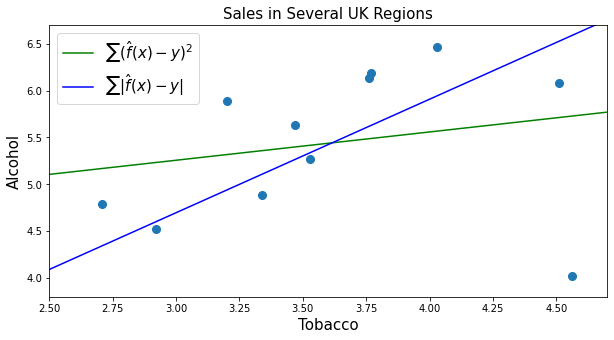

In [10]:
x_f_lr = np.linspace(1., 5., 200)
f_lr_MSE = lambda x: min_value_MSE[0] * x + min_value_MSE[1]
y_f_lr_MSE = f_lr_MSE(x_f_lr)

f_lr_MAE = lambda x: min_value_MAE[0] * x + min_value_MAE[1]
y_f_lr_MAE = f_lr_MAE(x_f_lr)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.set_xlabel('Tobacco', fontsize=15)
ax.set_ylabel('Alcohol', fontsize=15)
ax.set_title('Sales in Several UK Regions', fontsize=15)
ax.set_xlim([2.5, 4.7])
ax.set_ylim([3.8, 6.7])
ax.plot(x_f_lr, y_f_lr_MSE, 'g', label='$\sum (\hat f(x) - y)^2$')
ax.plot(x_f_lr, y_f_lr_MAE, 'b', label='$\sum |\hat f(x) - y|$')
# ax.plot(x_f_lr, y_f_lr, 'g');
ax.plot(X ,y,'o', ms=8)
plt.legend(fontsize=15)
plt.show()